In [14]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean, normaltest, iqr

# Load your dataset
df = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')  # Update path if needed

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Dictionary to store computed stats
stats_summary = {}

for col in numeric_cols.columns:
    data = numeric_cols[col].dropna()
    
    # Ensure enough data for normality test (min 8 samples)
    normality_p = normaltest(data)[1] if len(data) >= 8 else np.nan
    
    stats_summary[col] = {
        'Mean': data.mean(),
        'Median': data.median(),
        'Trimmed Mean (10%)': trim_mean(data, 0.1),
        'Variance': data.var(),
        'Standard Deviation': data.std(),
        'IQR': iqr(data),
        'Normality Test p-value': normality_p
    }

# Convert results to DataFrame
stats_df = pd.DataFrame(stats_summary).T
stats_df = stats_df.reset_index().rename(columns={'index': 'Feature'})

# Display summary statistics
print(stats_df)


             Feature         Mean  Median  Trimmed Mean (10%)      Variance  \
0    ApplicantIncome  4805.599455  3786.0         4052.989831  2.411483e+07   
1  CoapplicantIncome  1569.577657  1025.0         1193.837288  5.448639e+06   
2         LoanAmount   136.132597   125.0          129.344828  3.765866e+03   
3   Loan_Amount_Term   342.537396   360.0          358.927336  4.245388e+03   
4     Credit_History     0.825444     1.0            0.904412  1.445139e-01   

   Standard Deviation      IQR  Normality Test p-value  
0         4910.685399  2196.00           3.138990e-126  
1         2334.232099  2430.50            1.995736e-80  
2           61.366652    57.75            3.810805e-44  
3           65.156643     0.00            2.571199e-49  
4            0.380150     0.00            1.138033e-21  


Histogram + KDE: Shows distribution shape (skewness, modality)

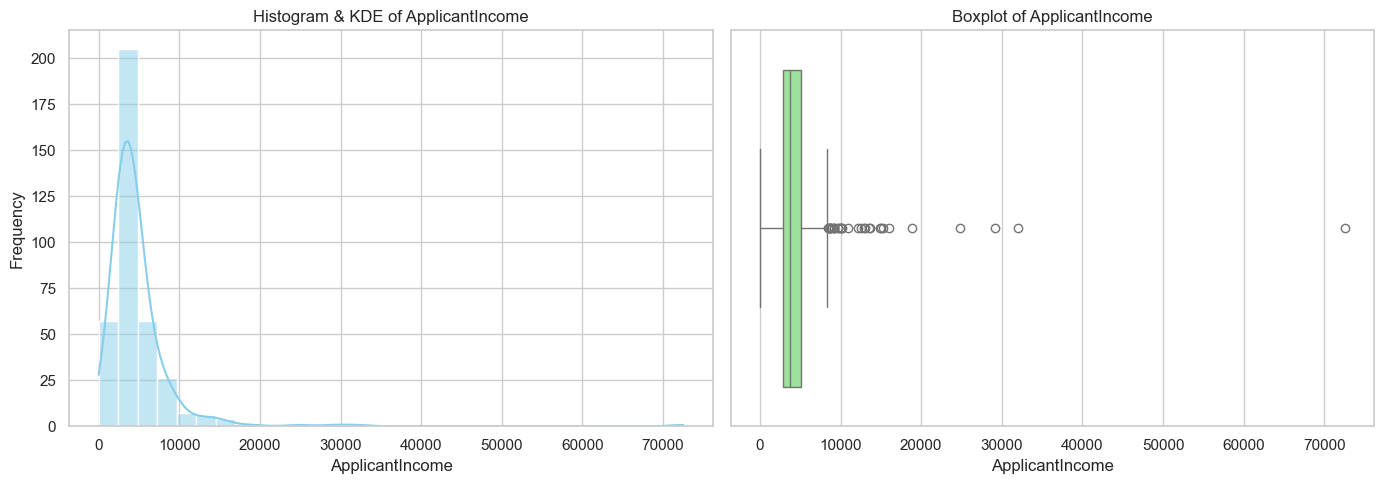

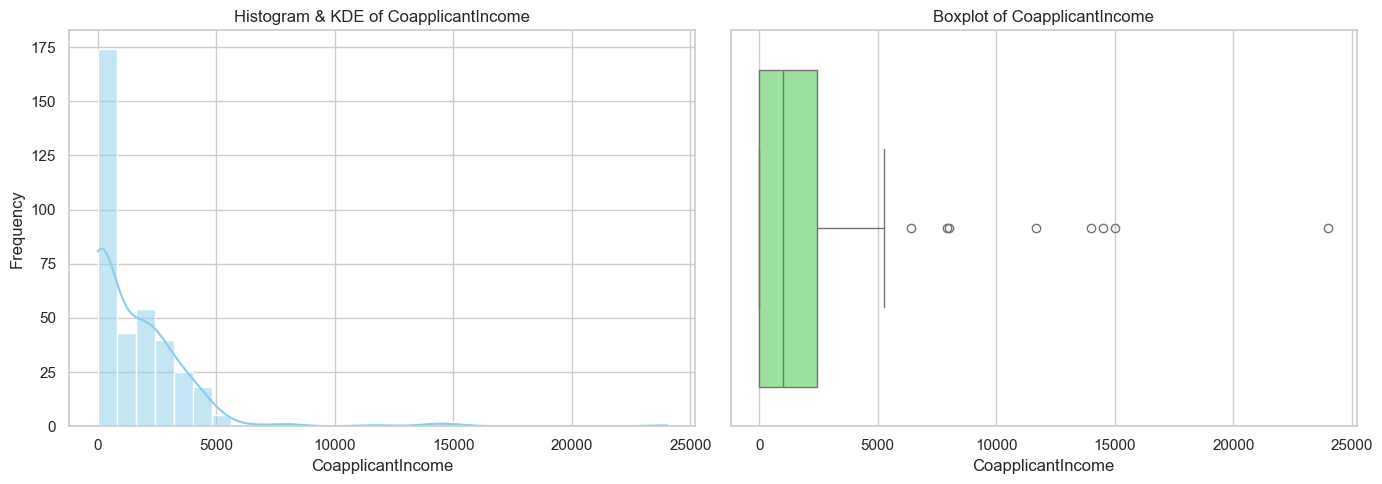

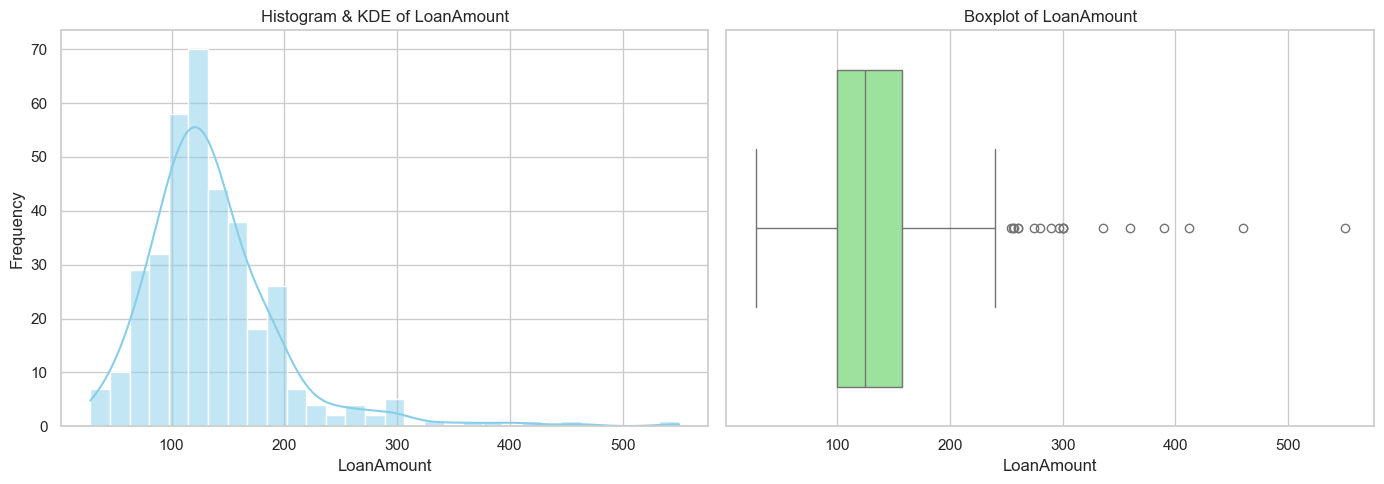

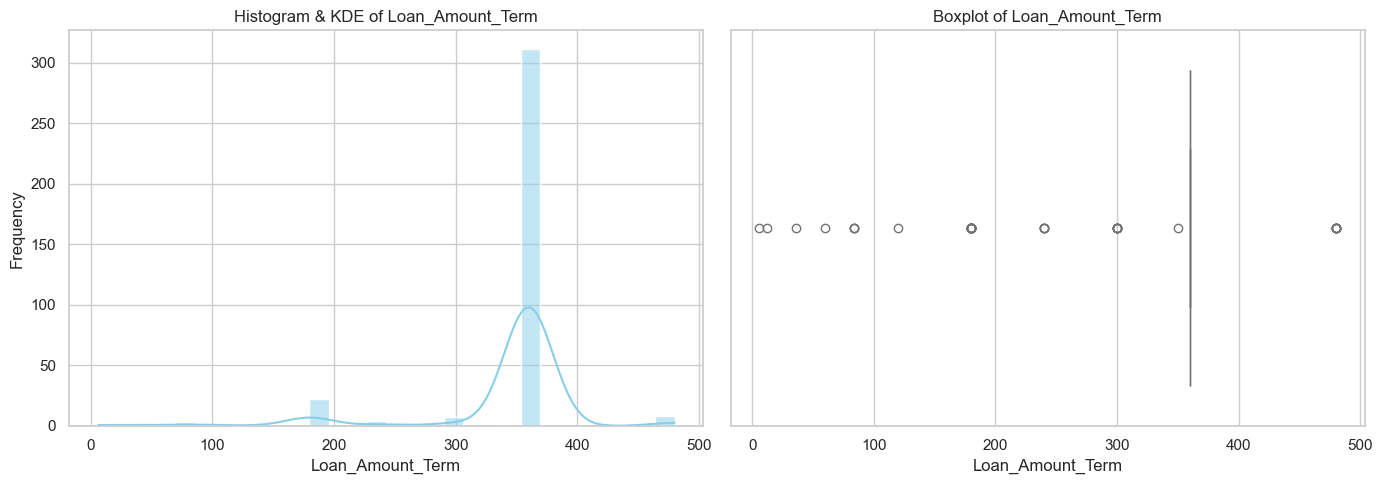

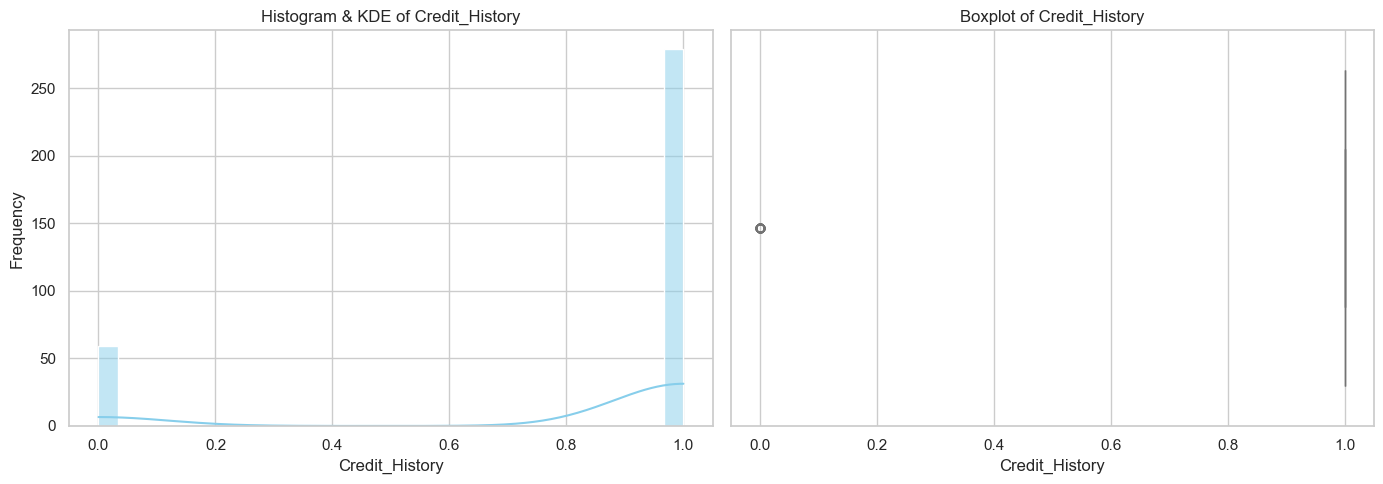

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

for col in numeric_cols.columns:
    plt.figure(figsize=(14, 5))
    
    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram & KDE of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()


Bar plots for each categorical column

              count unique       top freq
Loan_ID         367    367  LP002989    1
Gender          356      2      Male  286
Married         367      2       Yes  233
Dependents      357      4         0  200
Education       367      2  Graduate  283
Self_Employed   344      2        No  307
Property_Area   367      3     Urban  140


C:\Users\Shrusty Raj\AppData\Local\Temp\ipykernel_2924\3910503250.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


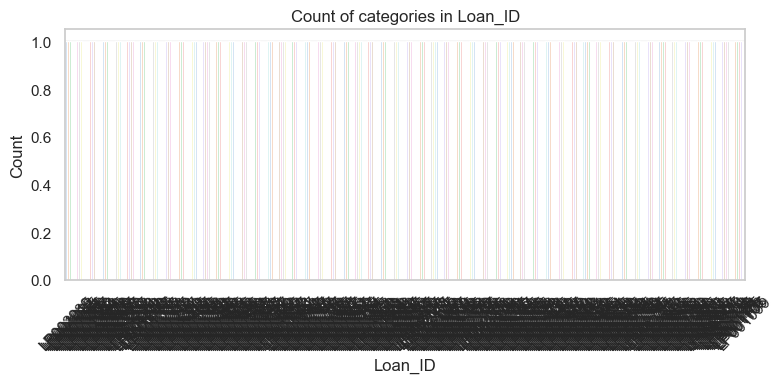

C:\Users\Shrusty Raj\AppData\Local\Temp\ipykernel_2924\3910503250.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


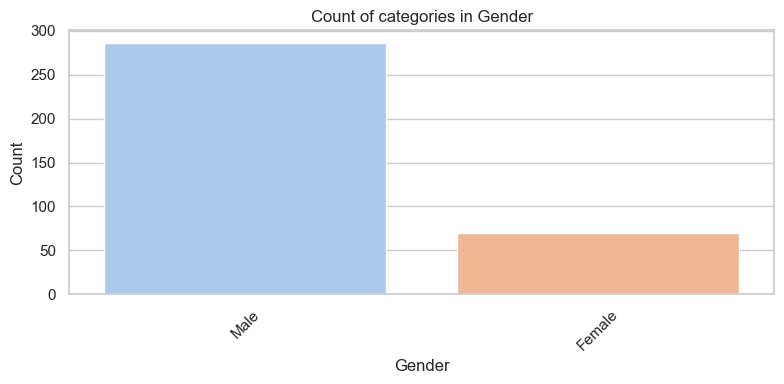

C:\Users\Shrusty Raj\AppData\Local\Temp\ipykernel_2924\3910503250.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


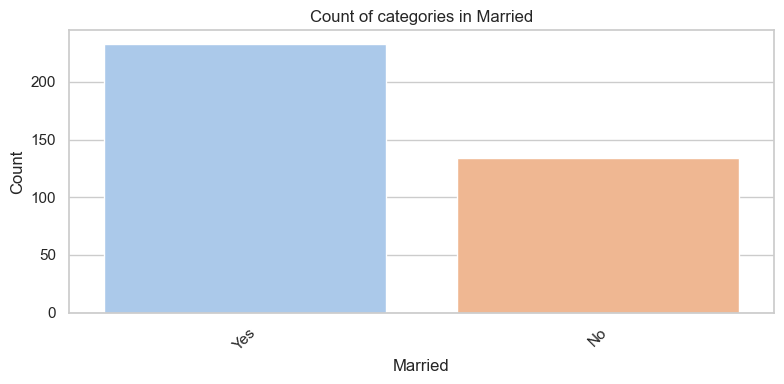

C:\Users\Shrusty Raj\AppData\Local\Temp\ipykernel_2924\3910503250.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


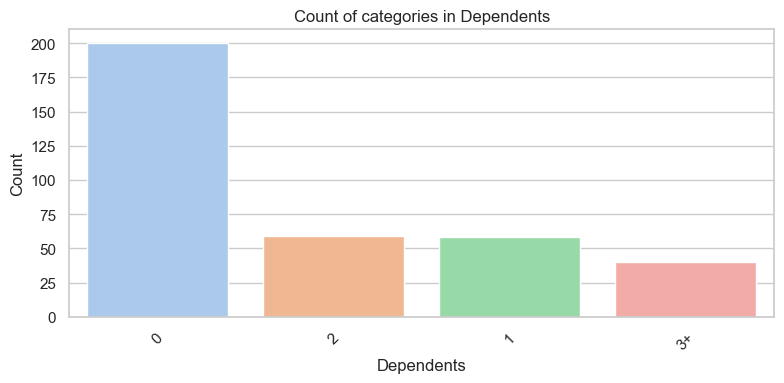

C:\Users\Shrusty Raj\AppData\Local\Temp\ipykernel_2924\3910503250.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


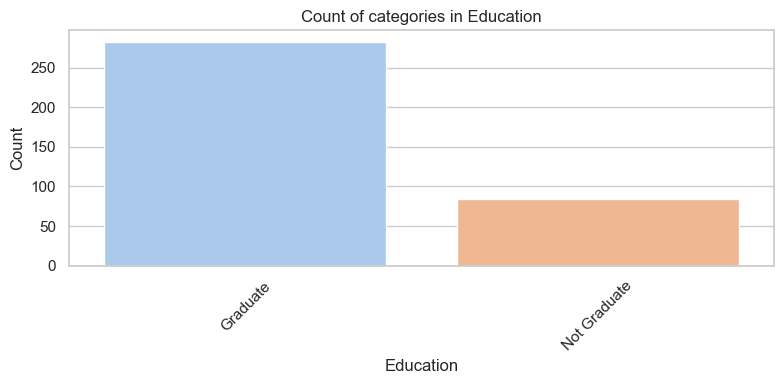

C:\Users\Shrusty Raj\AppData\Local\Temp\ipykernel_2924\3910503250.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


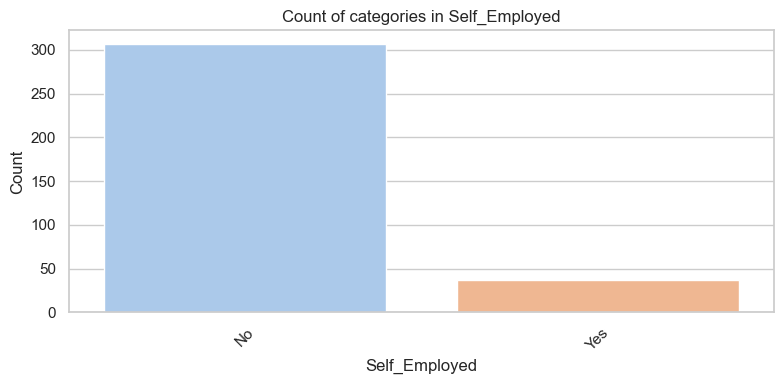

C:\Users\Shrusty Raj\AppData\Local\Temp\ipykernel_2924\3910503250.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


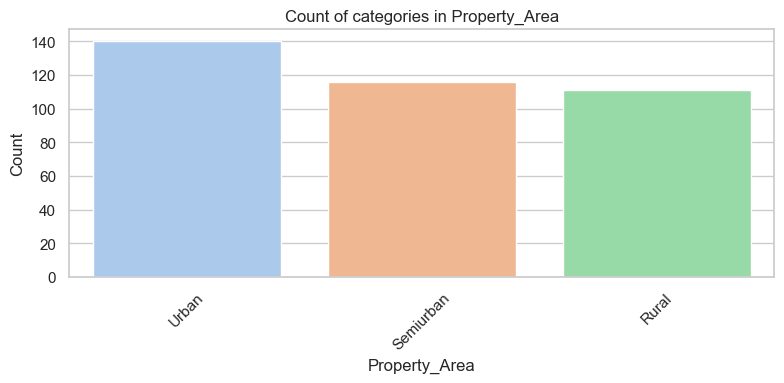

In [16]:
# Select categorical columns
cat_cols = df.select_dtypes(include=['object'])

# Summary statistics for categorical columns
cat_summary = cat_cols.describe().T
print(cat_summary)

# Bar plots for each categorical column
for col in cat_cols.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')
    plt.title(f'Count of categories in {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


Boxplot: Visualizes spread, median, and potential outliers

Original data size: 367
Data size after removing outliers in 'LoanAmount': 344


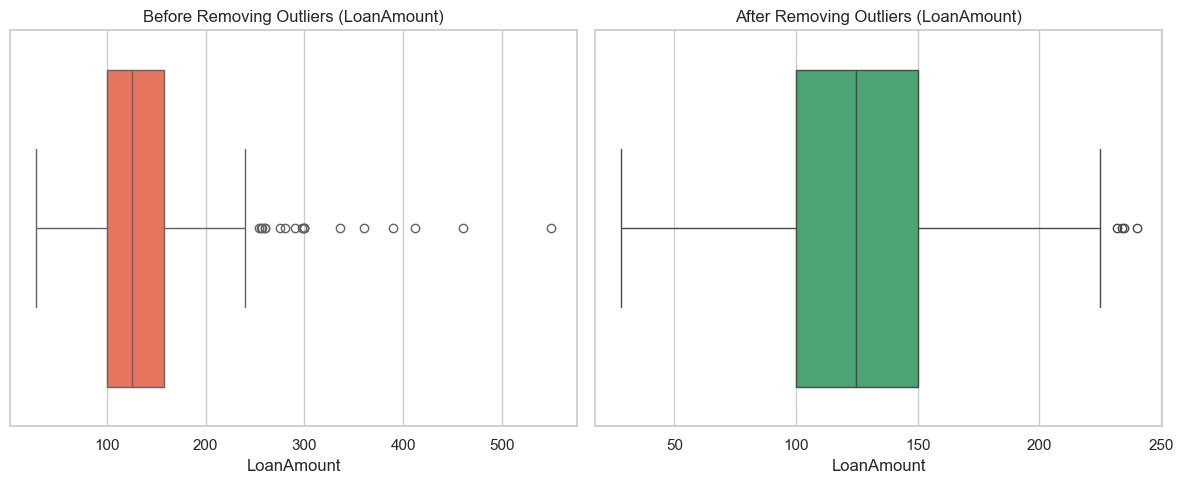

In [17]:
import matplotlib.pyplot as plt

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter data to exclude outliers
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

# Example: Remove outliers from 'LoanAmount'
print(f"Original data size: {df.shape[0]}")

df_clean = remove_outliers_iqr(df, 'LoanAmount')

print(f"Data size after removing outliers in 'LoanAmount': {df_clean.shape[0]}")

# Visualize before and after
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df['LoanAmount'], color='tomato')
plt.title('Before Removing Outliers (LoanAmount)')

plt.subplot(1,2,2)
sns.boxplot(x=df_clean['LoanAmount'], color='mediumseagreen')
plt.title('After Removing Outliers (LoanAmount)')

plt.tight_layout()
plt.show()


Correlation matrix

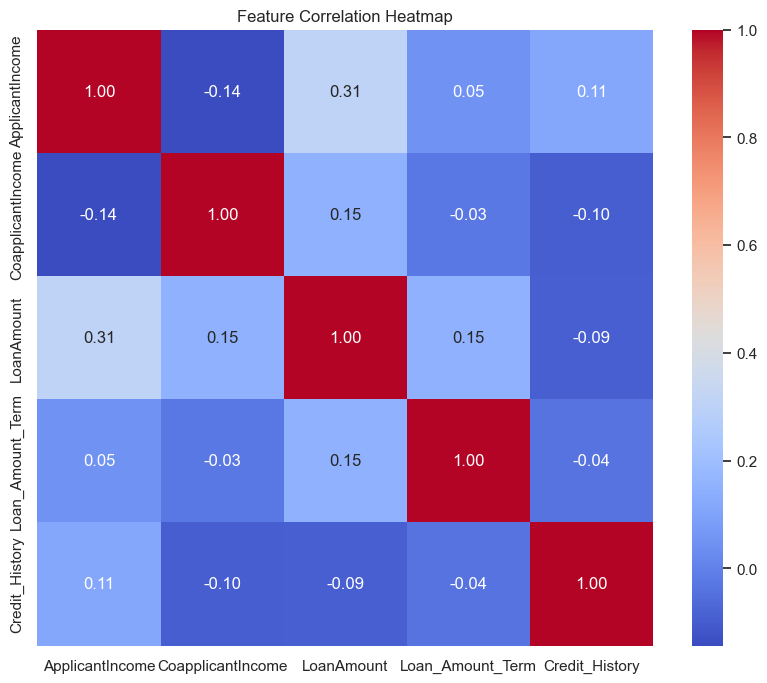

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use cleaned dataframe if available, else original
data_for_corr = df_clean if 'df_clean' in globals() else df

plt.figure(figsize=(10, 8))
corr = data_for_corr.select_dtypes(include=[np.number]).corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()


In [13]:
# Correlation matrix (all numeric features)
corr_matrix = data_for_corr.select_dtypes(include=[np.number]).corr()

# Display top correlated pairs (excluding self-correlations)
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Remove self-correlations
corr_pairs = corr_pairs[corr_pairs < 1.0]

# Drop duplicate pairs (e.g., (A,B) and (B,A))
corr_pairs = corr_pairs[~corr_pairs.duplicated()]

# Show top correlations
print("Top correlated feature pairs:\n")
print(corr_pairs.head(10))


Top correlated feature pairs:

LoanAmount         ApplicantIncome      0.307862
Loan_Amount_Term   LoanAmount           0.154129
LoanAmount         CoapplicantIncome    0.147492
ApplicantIncome    CoapplicantIncome    0.143616
                   Credit_History       0.111494
Credit_History     CoapplicantIncome    0.097799
LoanAmount         Credit_History       0.093212
Loan_Amount_Term   ApplicantIncome      0.048412
Credit_History     Loan_Amount_Term     0.038829
CoapplicantIncome  Loan_Amount_Term     0.027073
dtype: float64
